In [97]:
import json
import pandas
import os
import re
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from constants import *

In [98]:
all_text = ""
json_files = os.listdir(json_data_dir)
judgements_in_year = list(filter(lambda name: re.match(filesInYearPattern, name), json_files))

for filename in judgements_in_year:
    with open(os.path.join(json_data_dir, filename), 'r') as jsonFile:
        judgements = json.load(jsonFile)['items']
    year_filtered = filter(lambda item: year in item['judgmentDate'], judgements)
    texts = map(lambda item: item['textContent'], year_filtered)
    joined = " ".join(texts)
    notags = re.sub(r"<[^>]*>", " ", joined)
    nobreaks = re.sub(r"-\n", " ", notags)
    nodigits = re.sub(r"\d+", " ", nobreaks)
    noroman = re.sub(r"\b[XVILMC]+\b", "", nodigits)
    lower = noroman.lower()
    all_text += lower

counted_words = Counter(re.findall(r'\w{2,}', all_text))
counted_words.most_common(10)

[('na', 42894),
 ('do', 37881),
 ('nie', 30528),
 ('że', 22479),
 ('art', 18558),
 ('dnia', 18348),
 ('się', 18090),
 ('od', 16639),
 ('przez', 15630),
 ('sąd', 14021)]

In [99]:
with open('list.txt', 'w') as file:
    frequencies = counted_words.most_common()
    words = map(lambda x: f"{x[0]};{x[1]}\n", frequencies)
    file.writelines(words)

/home/marcin/tens1-6/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


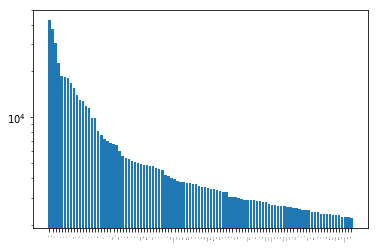

In [100]:
labels, values = zip(*counted_words.most_common(barplot_nr_of_items))
indexes = np.arange(len(labels))
plt.bar(indexes, values, log=True)
plt.xticks(indexes, labels, rotation='vertical', fontsize=1)
fig = plt.gcf()
fig.show()

In [101]:
pd = pandas.read_csv('../polimorfologik-2.1.txt',header=None,sep=";", usecols=[1])

In [ ]:
dictionary_set = set(pd[1].str.lower())

words_set = set(counted_words)

non_dictionary_words = words_set - dictionary_set
non_dict_list = list(non_dictionary_words)
examples = non_dict_list[:30]
examples


In [ ]:


def words(text): return re.findall(r'\w+', text.lower())

WORDS =counted_words 

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in dictionary_set)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyząćęłóśźż'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [ ]:
list(map(lambda word: (word, correction(word)),examples))